# Team Homework 10: Chebyshev, Sample Size

Complete this problem set with your group (up to 4 students). You can either hand-write your work and submit a hard copy, or go to File -> Download as HTML to generate an HTML file, then either submit it online or as a hard copy. Each group only needs to submit one copy and will receive the same grade. 


In [11]:
from datascience import *
%matplotlib inline
path_data = '../../../assets/data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
from math import ceil

### Chebychev's Bounds

Chevychev's theorem states that the proportion of data values that are within $z>1$ standard deviations of the mean, i.e. within the range $mean \pm z\cdot  SDs$ is at least $1 -\frac{1}{z^2}$. In mathematical notation, this is equivalent to:

$P(\frac{|X - \mu|}{SD} < z) \ge 1 -\frac{1}{z^2}$

The following example compares Chebychev's bounds with results from a right-skewed distribution. 

0.9054054054054054

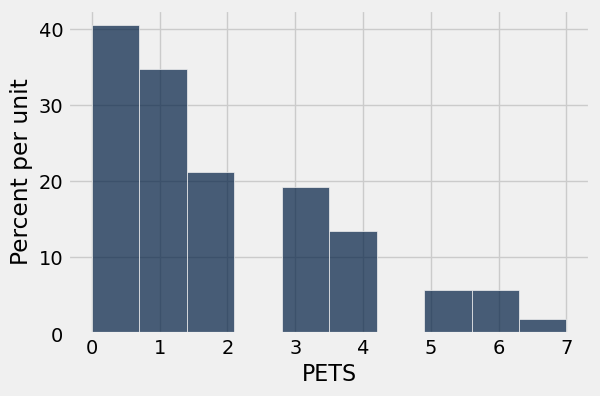

In [5]:
students = Table().read_table('student_data.csv')
students.hist('PETS')
pets = students.column('PETS')
m = np.average(pets)
s = np.std(pets)
# this is how you combine two conditions in np.count_nonzero
np.count_nonzero(np.logical_and(pets <= m+1.5*s, pets >= m-1.5*s)) / len(pets)

At least what proportion should be within 1.5 standard deviation of the mean, according to the Chebychev's theorem? (Note: this number should be less than what's calculated above)

In [6]:
1 - 1/(1.5**2)

0.5555555555555556

Do a similar comparison for $z=2$ and $z=3$. In each case, show the actual proportion from the data and the lower bound from Chevychev's theorem. 

### Sample Size 

The relationship between the sample size and the width of the confiden interval was shown to be 

$ width = 4\cdot \frac{SD}{\sqrt{\texttt{n}}}$, where $n$ is the sample size. 

If you solve for $n$ from the formula above, what is the equation that gives you the sample size based on the width of the interval? 

In Team Homework 8, we used the student data to construct a 95% confidence interval for the average age, with a width of the interval being 2.96 years. Using the SD of the student data as an approximation for the population standard deviation, calculate the sample size required to bring the width of the 95% confidence interval down to 1 year. 

In [13]:
sd = np.std(students.column('AGE'))

In [15]:
# calculate the sample size based on your formula

n = (4*sd)**2
n

683.8626734842951

Now test whether your sample size was sufficient by re-doing bootstrapping, this time by setting the sample size to be larger than the original sample size. 

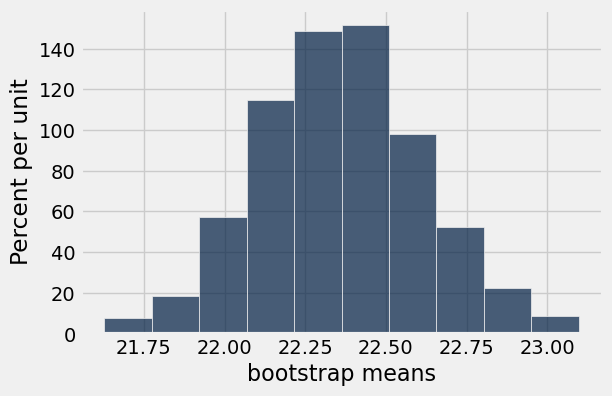

In [16]:
n = ceil(n) # round your sample size to a whole number and use it in bootstrapping

bootstrap_means = make_array()
for i in np.arange(1000):
    resampled_mean = np.average(students.sample(n).column('AGE'))
    bootstrap_means = np.append(bootstrap_means, resampled_mean)

Table().with_column('bootstrap means', bootstrap_means).hist()

Does your 95% confidence interval have the desired width? Test it below. 

In [17]:
percentile(97.5, bootstrap_means) - percentile(2.5, bootstrap_means)

0.98976608187134474